In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000176CC611550>]],
      dtype=object)

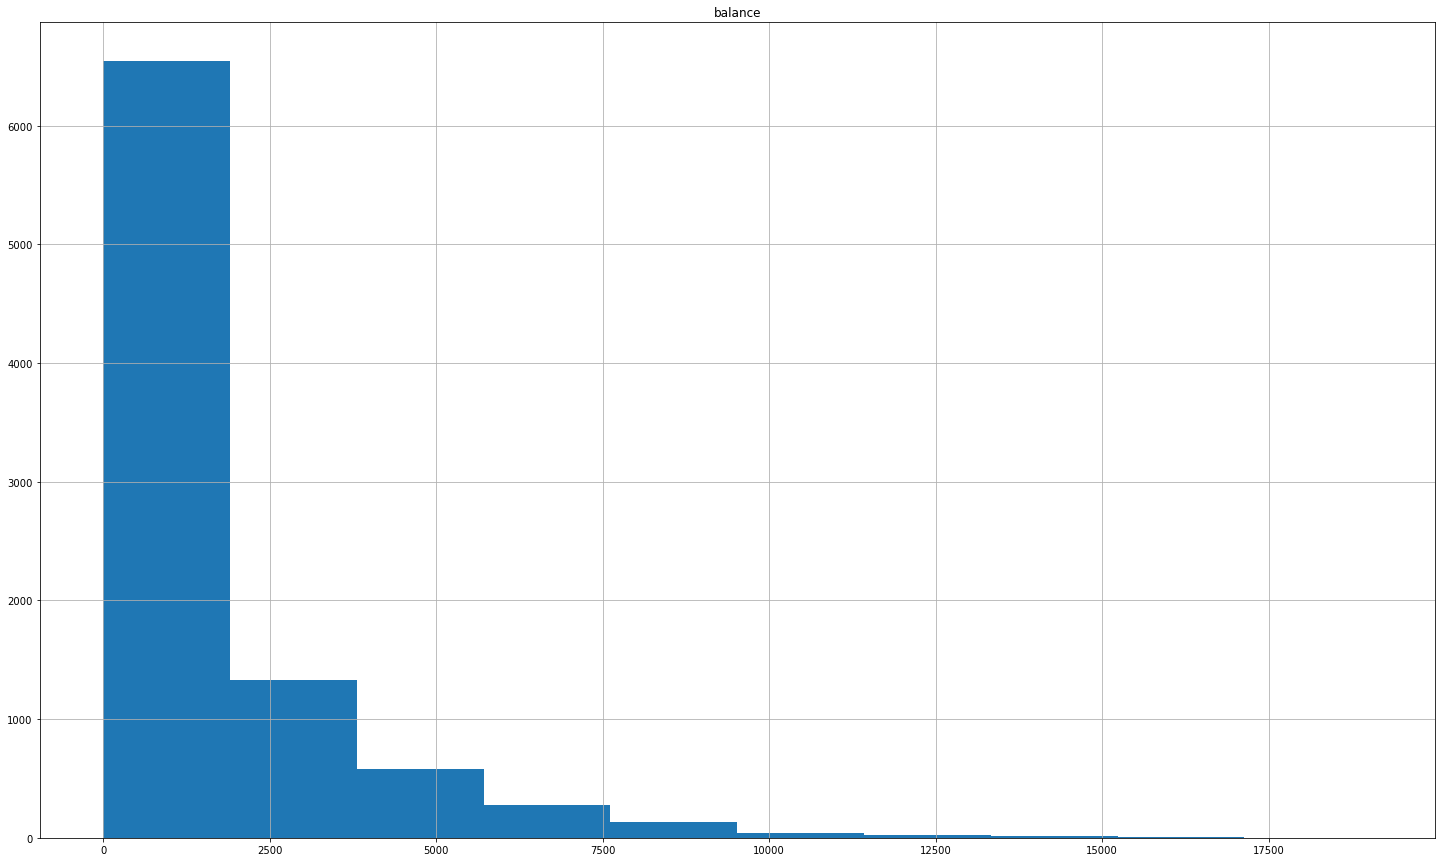

In [5]:
imported_data=pd.read_csv("Stori_Data_Challenge_2021._(1).csv")
imported_data.activated_date=pd.to_datetime(imported_data.activated_date, format='%Y-%m-%d')
imported_data["activated_date_YM"]=imported_data["activated_date"].dt.to_period('M')
imported_data.last_payment_date=pd.to_datetime(imported_data.last_payment_date, format='%Y-%m-%d')
imported_data["last_payment_date_YM"]=imported_data["last_payment_date"].dt.to_period('M')
imported_data.hist(column="balance",bins=10,figsize=(25,15))

,Unnamed: 0,cust_id,activated_date,last_payment_date,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,...,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,fraud,activated_date_YM,last_payment_date_YM
0,1,C10001,2019-10-06,2020-09-09,40.900749,0.818182,95.40,0.00,95.40,0.000000,...,0,2,1000.0,201.802084,139.509787,0.000000,12,0,2019-10,2020-09
1,2,C10002,2019-10-06,2020-07-04,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,...,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0,2019-10,2020-07
2,3,C10003,2019-10-06,2020-09-17,2495.148862,1.000000,773.17,773.17,0.00,0.000000,...,0,12,7500.0,622.066742,627.284787,0.000000,12,0,2019-10,2020-09
3,4,C10004,2019-10-06,2020-08-24,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,...,1,1,7500.0,0.000000,NaN,0.000000,12,0,2019-10,2020-08
4,5,C10005,2019-10-06,2020-10-20,817.714335,1.000000,16.00,16.00,0.00,0.000000,...,0,1,1200.0,678.334763,244.791237,0.000000,12,0,2019-10,2020-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,8946,C19186,2020-07-31,2020-11-03,28.493517,1.000000,291.12,0.00,291.12,0.000000,...,0,6,1000.0,325.594462,48.886365,0.500000,6,0,2020-07,2020-11
8946,8947,C19187,2020-07-31,2020-09-06,19.183215,1.000000,300.00,0.00,300.00,0.000000,...,0,6,1000.0,275.861322,NaN,0.000000,6,0,2020-07,2020-09
8947,8948,C19188,2020-07-31,2020-06-03,23.398673,0.833333,144.40,0.00,144.40,0.000000,...,0,5,1000.0,81.270775,82.418369,0.250000,6,0,2020-07,2020-06
8948,8949,C19189,2020-07-31,2020-07-19,13.457564,0.833333,0.00,0.00,0.00,36.558778,...,2,0,500.0,52.549959,55.755628,0.250000,6,0,2020-07,2020-07


In [30]:
data_summary=imported_data[["activated_date_YM","balance"]]
data_summary=data_summary.set_index("activated_date_YM")
median=data_summary.groupby("activated_date_YM").median()["balance"]
result_table=data_summary.groupby("activated_date_YM").mean()
result_table=result_table.rename(columns={"balance":"mean"})
result_table["median"]=median
result_table

,mean,median
activated_date_YM,,
2019-10,2482.234166,1524.409377
2019-11,1848.704323,1082.071173
2019-12,2018.788906,1162.588384
2020-01,1854.535889,1175.749847
2020-02,1747.350977,994.841733
2020-03,1554.973023,828.954823
2020-04,1483.183191,910.141912
2020-05,1214.333732,734.557681
2020-06,939.997996,472.791862


In [46]:
mindate=pd.to_datetime({"year":[2020],"month":[1],"day":[1]})
summary_2020=imported_data.loc[imported_data["activated_date"]>=mindate[0]]
summary_2020=summary_2020.loc[summary_2020["last_payment_date"]>=mindate[0]]

In [47]:
summary_2020=summary_2020[["cust_id","activated_date_YM","last_payment_date","cash_advance","credit_limit"]]
summary_2020["credit_limit_pct"]=summary_2020.cash_advance/summary_2020.credit_limit*100
summary_2020

,cust_id,activated_date_YM,last_payment_date,cash_advance,credit_limit,credit_limit_pct
2633,C12709,2020-01,2020-05-08,2431.292076,8000.0,30.391151
2634,C12710,2020-01,2020-05-26,0.000000,2000.0,0.000000
2635,C12712,2020-01,2020-10-20,0.000000,3000.0,0.000000
2636,C12713,2020-01,2020-08-22,0.000000,9000.0,0.000000
2637,C12714,2020-01,2020-04-26,78.763096,1500.0,5.250873
...,...,...,...,...,...,...
8945,C19186,2020-07,2020-11-03,0.000000,1000.0,0.000000
8946,C19187,2020-07,2020-09-06,0.000000,1000.0,0.000000
8947,C19188,2020-07,2020-06-03,0.000000,1000.0,0.000000
8948,C19189,2020-07,2020-07-19,36.558778,500.0,7.311756


In [48]:
summary_2020["cust_id"]=summary_2020["cust_id"].str.slice_replace(start=None, stop=1, repl='')

In [49]:
summary_2020

,cust_id,activated_date_YM,last_payment_date,cash_advance,credit_limit,credit_limit_pct
2633,12709,2020-01,2020-05-08,2431.292076,8000.0,30.391151
2634,12710,2020-01,2020-05-26,0.000000,2000.0,0.000000
2635,12712,2020-01,2020-10-20,0.000000,3000.0,0.000000
2636,12713,2020-01,2020-08-22,0.000000,9000.0,0.000000
2637,12714,2020-01,2020-04-26,78.763096,1500.0,5.250873
...,...,...,...,...,...,...
8945,19186,2020-07,2020-11-03,0.000000,1000.0,0.000000
8946,19187,2020-07,2020-09-06,0.000000,1000.0,0.000000
8947,19188,2020-07,2020-06-03,0.000000,1000.0,0.000000
8948,19189,2020-07,2020-07-19,36.558778,500.0,7.311756
